# E-commerce storage optimization

Date: *16/04/2023* <br>
Version: *5* <br>

**Course**: Managerial Decision Making & Modeling

**Investigator(s)**
- *Caumo Aldo, 866626@stud.unive.it*
- *Fiorentino Eleonora, 899000@stud.unive.it*
- *Solari Marco, 875475@stud.unive.it*

## Document review(s)

**Version: 5**
- Modified sections: 1, 5, 6, 7
- Description/modifications: added abstract; changed categories grouping in section 5; completed scenario 1 in section 6 and scenario 2 in section 7.
- Transmitted on date: 16/04/2023

# 1 - Abstract

The following project adresses an inventory optimization problem, starting from an e-commerce dataset about book sales with inventory and item's characteristics. With the available data, our task is to find the best mix of storage and on-demand printing to minimize costs and then to select the best catalogue to be kept always available in our warehouse/bookshop.
In order to do this, we built matematical models to run simulation based analysis of the cost structure (variable/fixed costs) relative to forecasted demand and the best inventory allocation to satisfy it.

In our first scenario (unlimited space), we found that the minimum cost is obtained by keeping almost all the books in storage.

Being unlimited space availabilty an unrealistic assumption, in the second scenario we studied how to assign the available space in an optimal way, considering three factors: the single book's demand, the demand of each category and the Gini coefficient.

In conclusion, the optimal solution depends on the available space, budget and the difference between printing and storage costs. After finding an optimal mix of these two elements, allocating the available space in an optimal way involves taking into consideration only a percentage of the demand and how much of it depends on business decisions.
In particular, you can decide whether to prioritize the variety or the demand.

# 2 - Acronyms and definitions

+ *Unive*:	Università Ca’ Foscari, Venezia.
+ *Facility*: warehouse with shelves, storage space and all necessities for an online bookstore.
+ *Book community*: set of books frequently bought together.
+ *Inventory*: full collection of all available books.
+ *Amazzoni Consulting S.R.L.*: winner of Best Fake Consulting Firm prize, year 2023 edition.
+ *COO*: Chief Operating Officer of a famous online book retailer.
+ *Client*: a famous online book retailer who shall not be named.
+ *Salesrank*: the sales rank is a number associated with each product on Amazon.com, which measures its demand of relative to other products. The lower the number is, the higher the sales of that particular product. The sales rank of a book is updated each hour to reflect recent and historical sales of every item sold on Amazon.com.
+ *GC*: short for Gini coefficient.


# 3 - Problem statement

Our consulting firm, Amazzoni Consulting S.R.L., has been given an inventory optimization task: a famous and successful online book retailer wants to optimize its warehouse space. Having comprehensive data on past year sales in the form of a graph, which contains links between books that are often bought together and the most relevant book communities, representing correlated sales between items in its inventory, he wishes to know whether it is more convenient to:

A.	Stock everything in its warehouse. \
B.	Stock only the most in-demand books and print the others as they are sold. \
C.	Keep only the retail platform and print everything on demand.

The optimization problem, therefore, involves understanding how to minimize the cost of keeping all the books available, comparing between different scenarios and costs.

What we are willing to do in order to estimate demand and to assign the space of our warehouse, is the following process: 

- First, to estimate the actual level of demand ($Demand(j)$) of a book from its salesrank ($SalesRank(j)$), we use a conversion model suggested by Goolsbee and Chevalier (2003) and by Brynjolfsson, Hu and Smith (2003).

$$Log[Demand(j)] = a + bLog[SalesRank(j)]$$

Where $Log$ is the *natural logarithm* (base $e$). This formula to convert SalesRank information into demand information was first introduced by Chevalier and Goolsbee (2003). Their goal was to estimate demand elasticity. Their approach was based on making an assumption about the probability distribution of book sales, and then fitting some demand data to this distribution. They choose the standard distributional assumption for this type of rank data, which is the Pareto distribution (i.e., a power law). In a later study, Brynjolfsson, Hu and Smith (2003) use data provided by a publisher selling on Amazon.com to conduct a more robust estimation of the parameters of the formula. They estimate the parameters:
$$
a = 10.526 \newline
b = -0.871
$$
We have used the latter estimate in our project.

- Once we have estimated the demand for each book, we calculate the sum of the books belonging to the same category, in order to see which ones sell the most: we will assign more space in the warehouse to the categories with the most sales.

Having the estimated demand for each category, we just need to divide them by the total demand (given by the sum of each book's demand), to obtain the percentage of warehouse space to be attributed to each category.

We will look at the Gini coefficient to see if the distribution of the category under consideration is homogeneous or not: low values of the coefficient indicate a fairly homogeneous distribution, while high values of the coefficient indicate a more unequal distribution.

We need this to understand how to fill the space assigned to each category of books.
If the Gini coefficient is low, the estimated demand for all the books in that category is similar; in this case we will distribute the space equally between the titles of the category; on the other hand, if the Gini coefficient is high, we will distribute the available space only to the most successful titles.

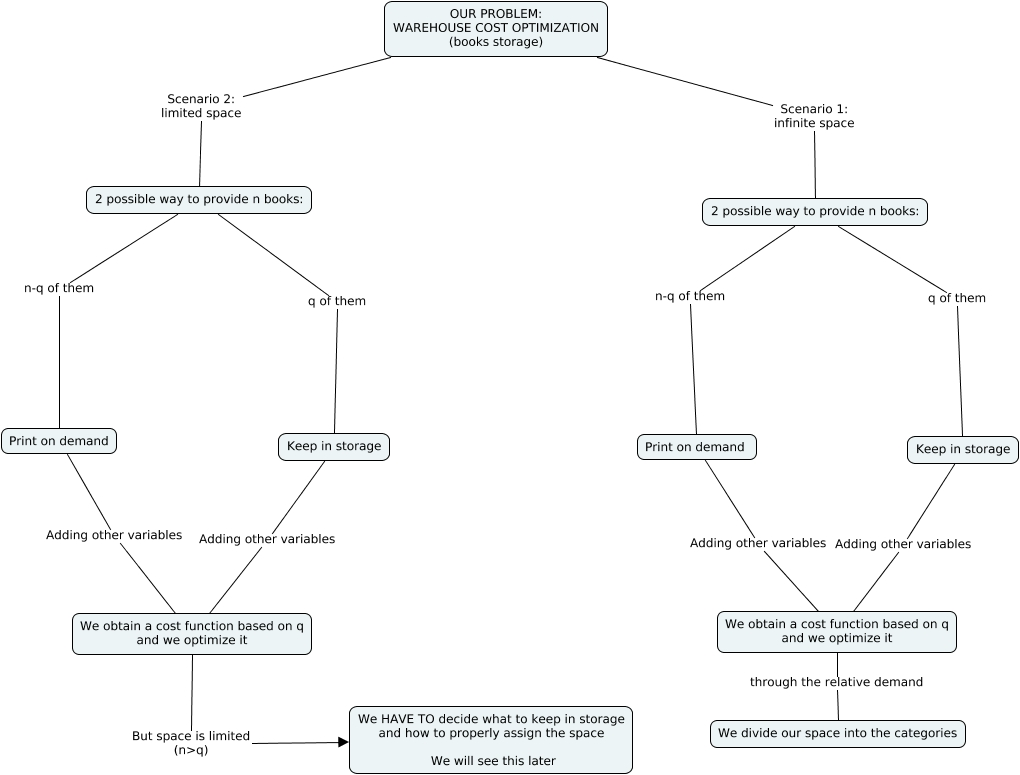

In [1]:
from IPython import display
try:
    from google.colab import drive
    drive.mount('/content/drive')
    data_path = '/content/drive/MyDrive/Colab Notebooks/Amazon co-purchase/E-commerce storage optimisation/Data/'
except:
    data_path = 'Data/'

display.Image(data_path+"Cmap-2.jpeg", width=1000)


# 4 - System

## 4.1 - Agents/DMs

Client: \
A. Absolute decisional power about warehouse inventory and whether to make or not a deal with a copy-shop to print some or all the books.\
B. Its objective is to minimize total costs, which fall in two main categories:

+ If books are kept inside a proprietary warehouse: storage costs.
+ Else, printing costs.
    
C.	Optimizing the inventory is thus a matter of understanding and minimizing the cost of the three main options (full storage, some storage & some printing, full printing on demand).
+ In case of *limited storage*, e.g. not enough capacity to store all the books in the warehouse, the matter is then *how to allocate the available space*. In this case, we need to rank books and/or categories based on their utility.


## 4.2 - Entities

1.	Copy-shop.
    + The copy shop on-demand price for printing books (which, from our client's perspective, is a *variable* cost). This cost is proportional to the number of printed books.
2.	Warehouse.
    + The warehouse has maintenance cost, which can be variable, fixed or both.
3.	Books.
  + Each book has a Salesrank and belongs to a category (label). We are considering a *standard size* and an *average price*.


## 4.3 - Relationships among elements


1.	Books that are bought the most and are bought together form a graph of links and edges.
+ ATTRIBUTE	Genre.
+ OBJECTIVE	Minimizing costs (storage vs printing).
+ CONSTRAINT	In the intermediate scenario (mixed storage and printing), book categories are used to *weight* books along with *demand* to understand how to allocate the available space while minimizing cost.
+ CONSTRAINT	Books can be either kept in storage or printed.

2.   Warehouse.
+ ATTRIBUTE	Storage costs. Increases with space allocated to books.
+ ATTRIBUTE Fixed costs. Has to be considered if at least a single book is kept in storage.
+ ATTRIBUTE: Non-linear costs. These costs have to be computed if a certain threshold is met: for example, there is an extra cost of € X every Y books.
+ CONSTRAINT	Space. Cannot exceed a certain limit.

3.	Copy-shop.
+ ATTRIBUTE	Can print an unlimited number of books on demand.
+ ATTRIBUTE	Printing costs.


## 4.4 - Other constituents of the system

We do not know how to reliably forecast future sales; however, we are addressing the storage problem as contingent to a specific date in which the client will receive a bulk order regarding all of its inventory (e.g. Christmas season). Therefore, we are not considering potential disturbances such as seasonality. We are estimating demand by using the Salesrank, taking in consideration how the presence of network structures alters demand patterns and computing each category density with the Gini coefficient.

Possible external disturbances could be related to: poor performance of the copy-shop and issues with order management; however, we are also assuming that orders are perfectly known and executed without errors and delays by all parties involved, which makes us indifferent in the choice between storing and printing.


## 4.5 - Assumptions

+ Costs $\in R^+$
+ Quantities $\in N$
+ Linear storage costs: all costs can be modelled through a linear function such as:
$$
Cost(q) = a + b \times q
$$
Where q is the total quantity of books kept in storage.
+ Linear printing costs: all costs can be modelled through a linear function such as:
$$
Cost(1 - q) = c \times (1 - q)
$$
Where $1 - q$ is the total quantity of books printed on-demand.
+ $b \leq c$: the variable cost of printing a book is greater than the variable cost of storage.
+ $a >>> b$: fixed costs are several order of magnitude greater than variables costs.
+ As $q$ meets certain thresholds, there are extra costs associated with *storing books*: e.g., every 5000 books an additional worker/some additional infrastructure is needed for € 19000 (*annual salary*).
+ Warehouse fixed costs $a$ and extra costs are paid $\iff q > 0$, where $q$ is the quantity of books kept in the warehouse.


# 5 - Data


### Description of the e-commerce catalog dataset

The data was collected in summer 2006 by crawling the Amazon website. The dataset provides information about product metadata and review metadata on 548,552 different products. For each product in the dataset, the following informations are available:
- Title
- Salesrank
- List of similar products (that get co-purchased with the current product)
- Detailed product categorization
- Product reviews: time, customer, rating, number of votes, number of people that found the review helpful

The data format is:
- ID: Product number (number 0, …, 548551)
- ASIN: Amazon Standard Identification Number is a 10-character alphanumeric unique identifier assigned by Amazon.com for product identification
- Title: Name/title of the product
- Group: The product group can be Book, DVD, Video or Music
- Sales rank: The Amazon sales rank represents how a product is selling in comparison to other products in its primary category. The lower the rank, the better a product is selling
- Similar: ASINs of co-purchased products, such as people who buy X also buy Y
- Categories: Location in product category hierarchy to which the product belongs (separated by |, category id in [...] )
- Reviews: Product review information such as the total number of reviews, average rating and the individual customer review information including time, user id, rating, total number of votes on the review, total number of helpfulness votes which means how many people found the review to be helpful

The dataset is available on the Stanford Network Analysis Project (SNAP) website from the following link: https://snap.stanford.edu/data/amazon-meta.html

### Warehouse & printing costs

We are estimating:
+ A [cost per square meter](https://www.logisticamente.it/Articoli/11448/logistica-immobiliare-un-mercato-in-fermento/) of € 60.
+ An [average book size](https://printondemand-worldwide.com/resources/printondemand-worldwide-book-size-guide/) of 19.7cm x 13.2cm.
+ An average book price of € 20.
+ Printing on demand costs are computed as a *percentage* of book price (e.g.: € 0.02 for a price of € 20).
+ [Cost of an additional warehouse worker](https://www.lavoro-economia.it/ccnl/ccnl.aspx?c=328): € 19000.

# 6 - Scenario 1: Unlimited storage space - Unlimited budget

## 6.1 - Mathematical model 

### Modelling costs

+ $\{q, a, b, c\} \geq 0$: all variables are positive.
  + $q \in \mathbb{N}$
  + $\{a, b, c \} \in \mathbb{R}$
+ $0 \leq q_i \leq Q_T $ = proportion of total books to be kept in the warehouse.
  + $Q_T = \sum_{j} Demand(j)$ = total quantity of books, demand-dependent.
  + $i = 1,...,71$ = number of books categories.
  + $j = 1, ... , Q_T$ = books.
  + $d_i$ = demand of the single book category $i$.
  + $q_i$ = quantity of books for category $i$ to be kept in storage
+ $s$ = $Q_T - q$ = proportion of books to be printed at the copy shop.
+ $\theta_m (q)$ = warehouse storage costs.

$$
\begin{cases}
a_1  q + b_1 \quad q \leq q_A \newline
a_2  q + b_2 \quad q_A < q \leq q_B \newline
a_3  q + b_3 \quad q_B < q \leq q_C \newline
... \newline
a_n q + b_n \quad q > q_k 
\end{cases}
$$

+ $c_S$ = printing costs.
+ $c_F$ = warehouse fixed costs.
+ $c_W$ = variable warehouse costs.
+ $c^r_M$ = mixed warehouse costs.
 + $r$ = number of costs threshold for mixed costs.

+ $\{ x_F, x_R \}$ are *dummy **binary** variables*:
$$
x_F = x_R =
\begin{cases}
0 \quad \mathrm{If \ all \ books \ are \ printed} \\
1 \quad \mathrm{If \ at \ least \ one \ book \ is \ kept \ in \ storage}
\end{cases}
$$

+ $0 \leq M \leq \infty$ is the total storage capacity.
+ $\bar Q^r$ is the quantity threshold over which extra costs have to be paid to keep books in storage.
  + $M \geq Q_{T}$
  + $q \leq M x_F$
  + $q - \bar Q^r \leq (M - \bar Q^r) x_R$, $\forall r$

### Objective function:

$$
\min_{q}  c_F \times x_F + \sum_r c^r_M \times x_R + c_W \times q_i + \sum_i c^i_S \times (d_i - q_i) 
$$


### 6.1.1 - Preliminary operations

#### Import required libraries

In [2]:
# Preliminary operations' code

# !pip install stemming
import string
import pandas as pd
import math
import re
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt

from nltk.corpus import stopwords
from stemming.porter2 import stem


In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    data_path = '/content/drive/MyDrive/Colab Notebooks/Amazon co-purchase/E-commerce storage optimisation/Data/'
except:
    data_path = 'Data/'

In [4]:
# Open the file to read Amazon Product Metadata
df = open(data_path + 'amazon-meta.txt', 'r', encoding='utf-8', errors= 'ignore')
    

#### Dataset Preprocessing

Before jumping into the  dataframe analysis, some preprocess is required to read the file and use ASIN as the key and the others as the metadata associated with ASIN.
- ID, ASIN, Title, Sales rank, Total reviews, and Average rating are the same as described above.
- All the categories associated with the ASIN are concatenated, and then the are subject to Text Preprocessing steps: lowercase, stemming, remove digit/punctuation, remove stop words, retain only unique words. 
- The copurchased ASINs in the “similar” field are filtered down to only those ASINs that have metadata associated with it.

In [5]:
# Initialize a nested product dictionary that will hold cleaned up amazon product data. 
amazonProducts= {}

# Read the data from the Amazon file and fill the amazonProducts nested dictionary
(Id, ASIN, Title, Category, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)

for line in df:
    line = line.strip()
    if(line.startswith("Id")): # a product block started
        Id = line[3:].strip()
    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    elif(line.startswith("title")):
        Title = line[6:].strip()
        Title = ' '.join(Title.split())
    elif(line.startswith("group")):
        Group = line[6:].strip()
    elif(line.startswith("salesrank")):
        SalesRank = line[10:].strip()
    elif(line.startswith("similar")):
        ls = line.split()
        Copurchased = ' '.join([c for c in ls[2:]])
    elif(line.startswith("|")): # taking the first category related to the product
        try:
            ls = line.split('|')[3].strip() # splitting the line at each | sign, taking the fourth element (in this case, the category)
            Category = re.sub("[\(\[].*?[\)\]]", "", ls) # removing parenthesis from the line
        except IndexError:
            continue
    elif(line.startswith("reviews")):
        ls = line.split()
        TotalReviews = ls[2].strip()
        AvgRating = ls[7].strip() # a product block ended
    elif (line==""): # write out fields to amazonProducts dictionary
        try:
            MetaData = {}
            if (ASIN != ""):
                amazonProducts[ASIN] = MetaData
            MetaData['Id'] = Id
            MetaData['Title'] = Title
            MetaData['Category'] = Category
            MetaData['Group'] = Group
            MetaData['Copurchased'] = Copurchased
            MetaData['SalesRank'] = int(SalesRank)
            MetaData['TotalReviews'] = int(TotalReviews)
            MetaData['AvgRating'] = float(AvgRating)
            MetaData['DegreeCentrality'] = DegreeCentrality
            MetaData['ClusteringCoeff'] = ClusteringCoeff
        except NameError:
            continue
        (Id, ASIN, Title, Category, Group, Copurchased, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff) = ("", "", "", "", "", "", 0, 0, 0.0, 0, 0.0)
df.close ;

The platform’s aim is to offer the largest number of various products while make it possible for customers to review them after the purchase. However, it started in 1994 as an online bookstore.
For this reason, together with the need to reduce the number of possible nodes in the network, we decided to focus only on the book category of products. To do so, the next step would be to filter the products dictionary down to only Group=Book and write it to amazonBooks dictionary.

In [6]:
#create book specific dictionary exclusively for books
amazonBooks = {}
for asin,metadata in amazonProducts.items():
    if (metadata['Group']=='Book'):
        amazonBooks[asin]=amazonProducts[asin]
        
#remove any copurchased items from copurchase list. If we don't have metadata associated with it
for asin, metadata in amazonBooks.items():
    amazonBooks[asin]['Copurchased']= ' '.join([cp for cp in metadata['Copurchased'].split() if cp in amazonBooks.keys()])

Now, write out Amazon books data to the amazon-books.txt file.

In [7]:
# Write amazonBooks data to file
df1 = open(data_path + 'amazon-books.txt', 'w', encoding = 'utf-8', errors = 'ignore')
    
df1.write('Id\t' + 'ASIN\t' + 'Title\t'+
         'Category\t' + 'Group\t' + 'Copurchased\t'+
         'SalesRank\t' + 'TotalReviews\t' + 'AvgRating\t'+
         'DegreeCentrality\t' + 'ClusteringCoeff\n')
for asin, metadata in amazonBooks.items():
    df1.write(metadata['Id'] + '\t' + 
              asin + '\t' +
              metadata['Title'] + '\t' +
              metadata['Category'] + '\t' +
              metadata['Group'] + '\t' +
              metadata['Copurchased'] +'\t' + 
              str(metadata['SalesRank']) + '\t' +
              str(metadata['TotalReviews']) + '\t' +
              str(metadata['AvgRating']) + '\t' +
              str(metadata['DegreeCentrality']) + '\t' +
              str(metadata['ClusteringCoeff']) + '\n')
df1.close()

In [8]:
books = pd.read_table(data_path + 'amazon-books.txt', index_col=0).drop(['AvgRating', 'Group', 'DegreeCentrality', 'ASIN', 'ClusteringCoeff', 'TotalReviews', 'Copurchased'], axis = 1)

books.reset_index(drop=True, inplace=True)
books


,Title,Category,SalesRank
0,Patterns of Preaching: A Sermon Sampler,Religion & Spirituality,396585
1,Candlemas: Feast of Flames,Religion & Spirituality,168596
2,World War II Allied Fighter Planes Trading Cards,Home & Garden,1270652
3,Life Application Bible Commentary: 1 and 2 Tim...,Religion & Spirituality,631289
4,Prayers That Avail Much for Business: Executive,Religion & Spirituality,455160
...,...,...,...
393556,Para alcanzar el orgasmo,"Health, Mind & Body",0
393557,Starting a Hedge Fund : A US Perspective,Business & Investing,0
393558,Facts Every Injured Worker Should Know,Law,0
393559,Adobe Photoshop 6 VTC Training CD,Home & Office,0


In [9]:
# remove items without category and items with Salesrank <= 0 (nosense)
books = books[books['Category'].notna()]
# books = books[books['SalesRank'].notna()]
books = books.drop(books[books.SalesRank <= 0].index)

In [10]:
# Get the frequency count of each category in the dataframe
category_counts = books['Category'].value_counts()
category_counts

Home & Office              35590
Religion & Spirituality    35333
Children's Books           34588
Nonfiction                 28378
Literature & Fiction       25624
                           ...  
Classical                      1
Dance & DJ                     1
Specialty Stores               1
Winnie the Pooh Store          1
Opera & Vocal                  1
Name: Category, Length: 78, dtype: int64

> Since there are categories containing only one title, we have to enclose these categories in more generic categories, otherwise the calculation of the gini coefficient for the latter would be 0.

In [11]:
# Filter the dataframe to only include rows where the category appears only once
unique_categories = category_counts[category_counts == 1].index
df_unique_categories = books[books['Category'].isin(unique_categories)]

# Get the names of the items whose category appears only once
df_unique_categories[['Title', 'Category']]

,Title,Category
156613,Comedy Favorites Volume 4 (4 Cassettes) (Basic...,Pop
210376,Old Time Radio Science Fiction (Smithsonian Co...,Miscellaneous
243857,"Mieczyslaw Horszowski, Piano",Classical
302068,England's Hidden Reverse : Coil-Current 93-Nur...,Dance & DJ
306272,Thank God It's Friday,Specialty Stores
355646,The Complete Poems Of Winnie-The-Pooh (Winnie-...,Winnie the Pooh Store
373089,LA Boheme (The Black Dog Opera Library),Opera & Vocal


> Searching Amazon inventory, we discovered that almost all of these titles were related to __music__: we therefore decided to include them in the "_music_" category. 
We have included the book of _Winnie-the-Pooh_ in the "_Children's books_" category, while "Thank god it's Friday" is a _movie_, and for this reason we have decided to remove it from the dataset.
Furthermore, taking a look at the number of categories that would remain, we realized that this number was too high and detailed for a simple bookshop. 
At this point, we decided to merge some categories into more general ones.

In [12]:
# Define a dictionary of old item names and their corresponding new names
name_changes = {
    'Health, Mind & Body': 'Entertainment',
    'Home & Garden': 'Entertainment',
    'Science Fiction & Fantasy': 'Literature & Fiction',
    'Teens': 'Literature & Fiction',
    'Biographies & Memoirs': 'History',
    'Sports': 'Entertainment',
    'Book Clubs': 'Books, Music & More',
    'Travel': 'Entertainment',
    'Romance': 'Literature & Fiction',
    'Cooking, Food & Wine': 'Professional & Technical',
    'Arts & Photography': 'Professional & Technical',
    'Parenting & Families': 'Entertainment',
    'Camera & Photo': 'Professional & Technical',
    'Outdoors & Nature': 'Entertainment',
    'New & Used Textbooks': 'Books, Music & More',
    'Boxed Sets': 'Books, Music & More',
    'Comics & Graphic Novels': "Children's Books",
    'jp-unknown1': 'Foreign Language Books',
    'jp-unknown2': 'Foreign Language Books',
    'jp-unknown3': 'Foreign Language Books',
    'Libros en español': 'Foreign Language Books',
    'Engineering': 'Professional & Technical',
    'Books on CD': 'Books, Music & More',
    'Books on Tape': 'Books, Music & More',
    'Medicine': 'Science',
    'Horror': 'Literature & Fiction',
    'Software Books': 'Computers & Internet',
    'Gift Categories': 'Books, Music & More',
    'Amazon.com Outlet': 'Books, Music & More',
    'Star Wars': 'Literature & Fiction',
    'Gay & Lesbian': 'Literature & Fiction',
    'Book Accessories': 'Books, Music & More',
    'Large Print': 'Books, Music & More',
    "O'Reilly": 'Books, Music & More',
    'Stephen E. Ambrose': 'Books, Music & More',
    'Law': 'Professional & Technical',
    'McGraw-Hill': 'Books, Music & More',
    'Pokémon': "Children's Books",
    'HOWdesign Studio': 'Books, Music & More',
    'Accessories': 'Books, Music & More',
    'Madeline': 'Books, Music & More',
    'Holiday Greeting Cards': 'Books, Music & More',
    'Genres': 'Books, Music & More',
    'Stationary': 'Books, Music & More',
    'Video Games': 'Books, Music & More',
    "Oprah's Book Club®": 'Literature & Fiction',
    'The Simpsons': "Children's Books",
    'Twins & Multiples Boutique': 'Books, Music & More',
    'John Wiley & Sons': 'Books, Music & More',
    'Calendars': 'Books, Music & More',
    'Microsoft': 'Computers & Internet',
    'Sheet Music & Scores': 'Books, Music & More',
    'Barbie': "Children's Books",
    'Teletubbies': "Children's Books",
    'Oprah®': 'Literature & Fiction',
    'Pop': 'Books, Music & More',
    'Miscellaneous': 'Books, Music & More',
    'Classical': 'Books, Music & More',
    'Dance & DJ': 'Books, Music & More',
    'Opera & Vocal': 'Books, Music & More',
    'Winnie the Pooh Store' : "Children's Books",
    'Scholastic': 'Books, Music & More',
    'Journals': 'Books, Music & More'
}

# Replace the old names with the new names
books['Category'].replace(name_changes, inplace=True)


# Delete items with a specific category name
books = books[books['Category'] != 'Specialty Stores']


books.to_csv(data_path + 'amazon-books.csv')
    

We are now ready  to compute each book demand. We will use the relationship described in __section 3__:

$$Log[Demand(j)] = a + bLog[SalesRank(j)]$$

Rearranging its terms yields the following equation:

$$Demand(j) = e^{a + bLog[SalesRank(j)]}$$

In [13]:
# create a new column containing the logarithm of the numbers column
a = 10.526
b = -0.871

books['demand'] = np.exp(a + b*np.log(books['SalesRank']))

books = books.reset_index(drop=True)
books

,Title,Category,SalesRank,demand
0,Patterns of Preaching: A Sermon Sampler,Religion & Spirituality,396585,0.495716
1,Candlemas: Feast of Flames,Religion & Spirituality,168596,1.044239
2,World War II Allied Fighter Planes Trading Cards,Entertainment,1270652,0.179795
3,Life Application Bible Commentary: 1 and 2 Tim...,Religion & Spirituality,631289,0.330662
4,Prayers That Avail Much for Business: Executive,Religion & Spirituality,455160,0.439666
...,...,...,...,...
374895,Statistics for Veterinary and Animal Science,Professional & Technical,707925,0.299257
374896,Implementation,Home & Office,98881,1.662036
374897,Aquatic Entomology: The Fishermen's Guide and ...,Reference,124435,1.360469
374898,Needless Casualties of War,Religion & Spirituality,34810,4.126288


In [14]:
# sum the values of all categories
total = books['demand'].sum()

# group by categories and calculate each demand
category_demand = books.groupby('Category')['demand'].sum()

# group by categories and calculate the percentage on the total
category_percentage = books.groupby('Category')['demand'].sum() / total * 100

# Create a new dataframe with the category names and their respective percentage values
categories_data = pd.DataFrame({
    'Category': category_percentage.index,
    'demand_abs': [int(x) for x in category_demand],
    'demand_rel': category_percentage.values.round(4)
})

# Sort the values and merge them with the gini dataframe
categories_data = categories_data.sort_values('demand_abs', ascending=False)

categories_data

,Category,demand_abs,demand_rel
3,Entertainment,102548,17.7830
7,Literature & Fiction,86503,15.0006
6,Home & Office,65403,11.3417
1,Children's Books,54431,9.4390
12,Religion & Spirituality,51634,8.9539
10,Professional & Technical,46980,8.1469
0,"Books, Music & More",41456,7.1889
9,Nonfiction,29609,5.1345
5,History,26427,4.5829
11,Reference,24102,4.1797


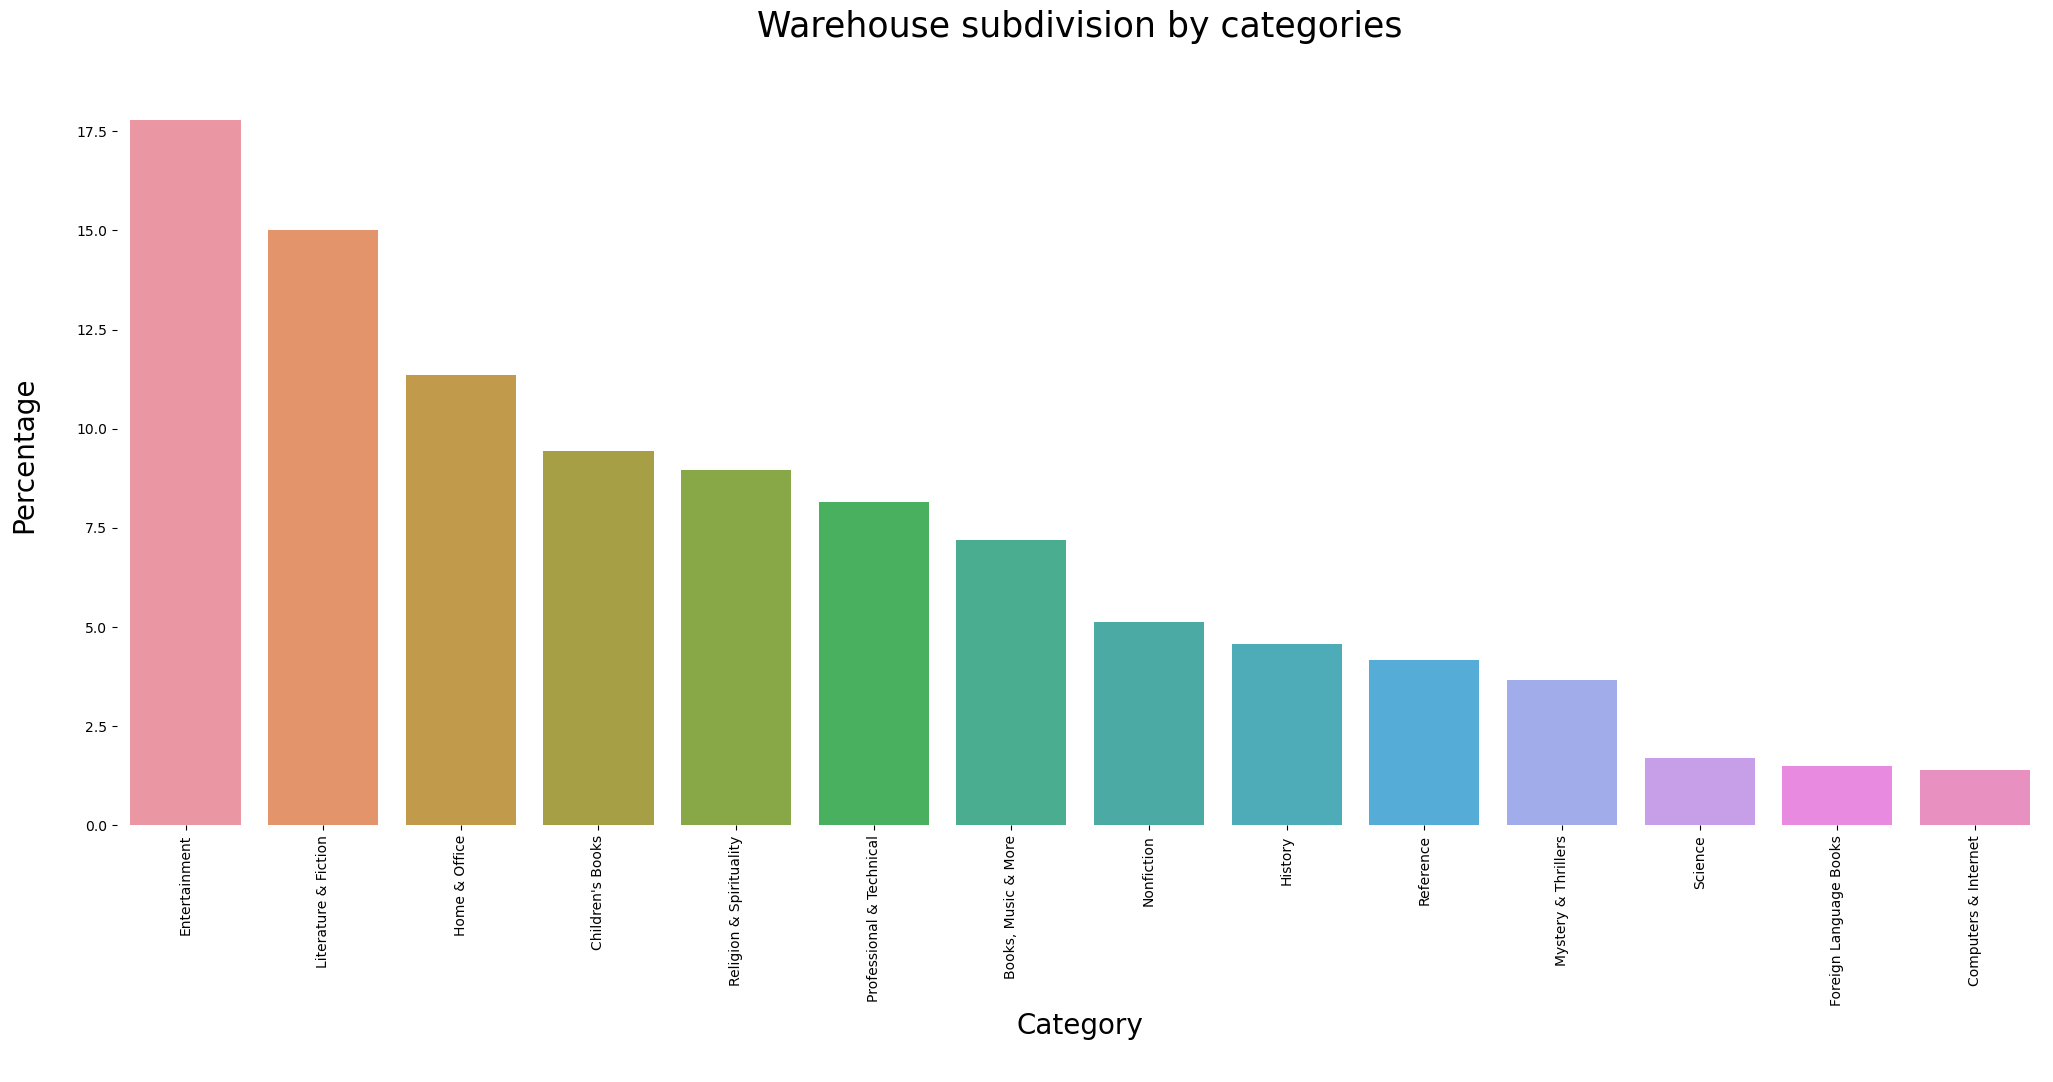

In [15]:
# plot
fig, ax = plt.subplots(figsize=(20, 8))
plt.tight_layout()

sns.barplot(x=categories_data['Category'], y=categories_data['demand_rel'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Warehouse subdivision by categories\n",fontsize=25)
ax.set_xlabel("Category\n",fontsize=20)
ax.set_ylabel("Percentage\n",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show() ;

#### Computing the Gini coefficient and plotting examples

In [16]:
# defining a function that calculate the gini coefficient for an array of values
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [17]:
# create a dictionary with categories as keys and array of numbers (related to the demand of the categories) as values
books_dict = {}

# group the dataframe by category and iterate over the groups
for category, group in books.groupby('Category'):
    # convert the values of the group to a NumPy array and store it in the dictionary
    books_dict[category] = np.array(sorted(group['demand']))


# print(books_dict)

The `categories_data` data frame will contain all the relevant indexes: these will be used in the following scenarios to decide how to assign the limited storage space to books.

In [18]:
keys = []
results = []

# iterate over the keys and values in the dictionary
for key, values in books_dict.items():
    # apply the function to the array of values for this key
    result = gini(values)
    
    # append the key and result to the corresponding lists
    keys.append(key)
    results.append(result)

# create a dataframe from the two lists
categories_gini = pd.DataFrame({'Category': keys, 'gini_coef': results})

categories_data = pd.merge(categories_data, categories_gini, on='Category')
categories_data

,Category,demand_abs,demand_rel,gini_coef
0,Entertainment,102548,17.7830,0.727812
1,Literature & Fiction,86503,15.0006,0.775516
2,Home & Office,65403,11.3417,0.780622
3,Children's Books,54431,9.4390,0.726614
4,Religion & Spirituality,51634,8.9539,0.700190
5,Professional & Technical,46980,8.1469,0.662834
6,"Books, Music & More",41456,7.1889,0.816493
7,Nonfiction,29609,5.1345,0.651792
8,History,26427,4.5829,0.695269
9,Reference,24102,4.1797,0.730473


In [19]:
# plot

def plot_gini(category1, category2):
    #Graph drawing
    fig, ax = plt.subplots(2, 2, figsize=(16,9))

    #Substitute a numeric sequence for x
    x1 = np.arange(1, len(books_dict[category1])+1)
    #Substitute the cumulative demand for y
    y1 = books_dict[category1].cumsum()

    # x,Standardize with the maximum value of y and draw with a blue line
    sns.lineplot(x=x1/max(x1), y=y1/max(y1), label="observed", ax=ax[0,0], color = '#1e66f5')
    # As a uniform distribution, y=x graph drawing
    sns.lineplot(x=x1/max(x1), y=x1/max(x1), label="perfect eq.", ax=ax[0,0], linestyle='--', color = '#fe640b')
    # fill in between
    ax[0,0].fill_between(x1/max(x1), y1/max(y1), color='#1e66f5')

    # Draw frequency distribution on ax2
    sns.histplot(x=y1/max(y1), bins=20, ax=ax[1,0], color='#1e66f5', edgecolor='w')
    
    # repeat for 2nd category
    x2 = np.arange(1, len(books_dict[category2])+1)
    y2 = books_dict[category2].cumsum()

    sns.lineplot(x=x2/max(x2), y=y2/max(y2), label="observed", ax=ax[0,1], color = '#1e66f5')
    sns.lineplot(x=x2/max(x2), y=x2/max(x2), label="perfect eq.", ax=ax[0,1], linestyle='--', color = '#fe640b')
    ax[0,1].fill_between(x2/max(x2), y2/max(y2), color='#1e66f5')

    sns.histplot(x=y2/max(y2), bins=20, ax=ax[1,1], color='#1e66f5', edgecolor='w')

    # set labels
    ax[0,0].set_title(f"{category1} (Gini: {round(categories_data[categories_data['Category'] == category1]['gini_coef'].values[0],3)})\n",fontsize=15)
    ax[0,0].set_xlabel("Books",fontsize=10)
    ax[0,0].set_ylabel("Demand cumsum",fontsize=10)
    
    ax[0,1].set_title(f"{category2} (Gini: {round(categories_data[categories_data['Category'] == category2]['gini_coef'].values[0],3)})\n",fontsize=15)
    ax[0,1].set_xlabel("Books",fontsize=10)
    ax[0,1].set_ylabel("Demand cumsum",fontsize=10)

    ax[1,0].set_xlabel("Demand",fontsize=10)
    ax[1,0].set_ylabel("Frequency",fontsize=10)

    ax[1,1].set_xlabel("Demand",fontsize=10)
    ax[1,1].set_ylabel("Frequency",fontsize=10)

    plt.show()

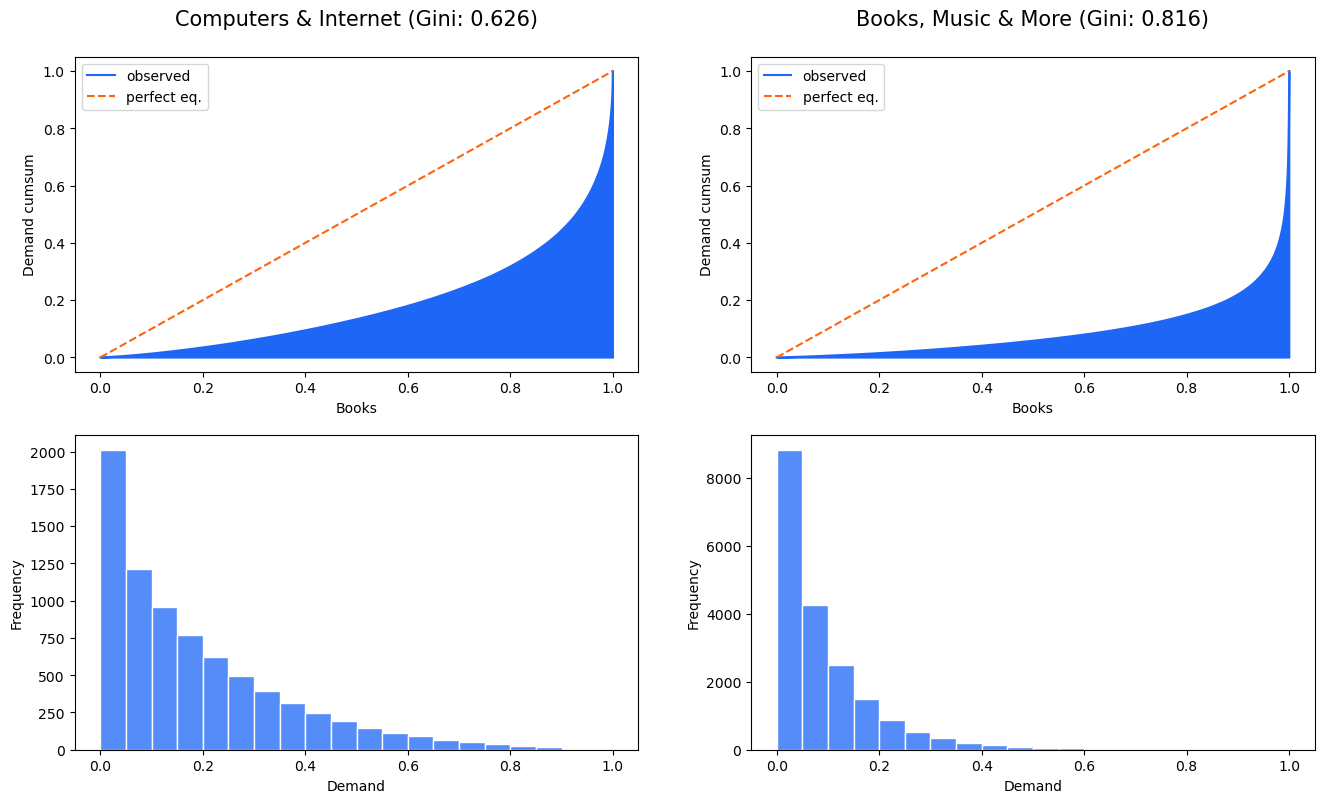

In [20]:
plot_gini("Computers & Internet", "Books, Music & More")

### 6.1.2 - Sets

All sets necessary to obtain the model solution and run the simulations are declared in the body of `linear_mag`.

### 6.1.3 - Parameters

All the main parameters in this section correspond to:

+ $c_S$ = printing costs.
  + These are computed as a proportion of the mean book price. 
  + `mean_price`, `perc`
+ $c_F$ = warehouse fixed costs.
  + `fixed_cost`
+ $c_W$ = variable warehouse costs.
  + `storage_costs`
+ $c^r_M$ = mixed warehouse costs.
  + `extra_cost`
+ $\bar Q^r$ = threshold for mixed warehouse costs.
  + `cost_threshold`
+ $M$ = maximum storage capacity.
  + `M`
+ $Q_T$ = total demanded books
  + `QT`

In [21]:
# code that reads the parameter values

mean_price = 20
perc = 0.6
fixed_cost = 5*10**5
storage_costs = 0.1
extra_cost = 19000
cost_threshold = 5000
QT = total
M = QT #in this first scenario, QT <= M


### 6.1.4 - Variables

- *Decision variables*:
  + `simulation_results` is a *dictionary* containing the main results of the minimization. All values are **integers**.

```
    simulation_results = {
        "Books_on_demand": on_demand, #books to be printed on demand, or QT - q
        "Books_stored": min_books_stored, #books to be kept in storage, or q
        "Total_cost": min_total_costs #total cost at the optimum
        }
```

- *Auxiliary variables*:
  + `fixed_cost_dummy`: **binary variable** for $x_R, x_F$.

In [22]:
# code that defines the variables
#Dummy for fixed storage cost:
def fixed_cost_dummy(q):
    """Dummy variable for fixed cost; if q > 0, 
    fixed cost are included in the computations.

    Args:
        q (numeric): proportion of books stored.

    Returns:
        boolean: True if at least one book is kept in storage;
                 False if no books are in storage.
    """
    try:
        if (q == 0):
            return False
        elif (q > 0):
            return True
    except:
        if (q == 0).any():
            return False
        elif (q > 0).any():
            return True

### 6.1.5 - Constraints and Objective(s)

The storage has to be partitioned by using the following weights, given the result of the minimization $q^*$ (the optimal quantity of books kept in storage) and $Q_T - q^*$ (the optimal quantity of books printed of demand).

Given total demand, if $Q_t > q^*$, only the categories with higher demand will be kept in storage until $q^*$ is reached; if all the books in a given category cannot be stored, books with higher demand will be given priority in allocating space.

`space_assigned`, which is the output of `SpaceDivision` (*a function that in this first, unlimited space scenario distributes the available space to each book category*) show the total percentage of space given to a category $i$ if $Q_t = q^*$.

In [23]:
# codes that defines the objectives and the constraints of the model.

categories_data

,Category,demand_abs,demand_rel,gini_coef
0,Entertainment,102548,17.7830,0.727812
1,Literature & Fiction,86503,15.0006,0.775516
2,Home & Office,65403,11.3417,0.780622
3,Children's Books,54431,9.4390,0.726614
4,Religion & Spirituality,51634,8.9539,0.700190
5,Professional & Technical,46980,8.1469,0.662834
6,"Books, Music & More",41456,7.1889,0.816493
7,Nonfiction,29609,5.1345,0.651792
8,History,26427,4.5829,0.695269
9,Reference,24102,4.1797,0.730473


As an example, we compute the space division that corresponds to the decision *all books are to be kept in store*:
$$
q = Q_t
$$

We will use `total`, which is the variable that keeps track of the total number of books in the catalogue.

In [24]:
def SpaceDivision (WarehouseSpace):
    """This function divides the available space for scenario 1,
    that is the available space is equal to the number of total books.

    Args:
        WarehouseSpace (numeric): the available storage space

    Returns:
        categories_data['space_assigned']: creates a new column with the total space assigned
    """        

    categories_data['space_assigned'] = round(categories_data['demand_rel']*WarehouseSpace/100)
    return categories_data

In [25]:
SpaceDivision(total)

,Category,demand_abs,demand_rel,gini_coef,space_assigned
0,Entertainment,102548,17.7830,0.727812,102549.0
1,Literature & Fiction,86503,15.0006,0.775516,86503.0
2,Home & Office,65403,11.3417,0.780622,65404.0
3,Children's Books,54431,9.4390,0.726614,54432.0
4,Religion & Spirituality,51634,8.9539,0.700190,51634.0
5,Professional & Technical,46980,8.1469,0.662834,46980.0
6,"Books, Music & More",41456,7.1889,0.816493,41456.0
7,Nonfiction,29609,5.1345,0.651792,29609.0
8,History,26427,4.5829,0.695269,26428.0
9,Reference,24102,4.1797,0.730473,24103.0


## 6.2 - Model solution


In [26]:
# code that calls the functions that solve the model and stores the values of the variables:

#Function for the scenario 1 model:
def linear_mag(mean_price, QT, M, perc, fixed_cost, storage_costs, cost_threshold, extra_cost):
    """Simulates different on demand printing quantities which minimise total cost for different cost structures;
    plots the corresponding cost as a function of QT (books to be kept in storage)
    and returns the value of books to be printed on demand and to be kept in storage as a tuple.

    Args:
        mean_price (numeric): mean book price.
        QT (numeric): total book quantity.
        M (numeric): total storage capacity.
        perc (numeric): cost of printing books; has to be 0 < perc < 1.
        fixed_cost (numeric): fixed warehouse cost (a).
        storage_costs (numeric): variable warehouse cost (b).
        cost_threshold (numeric): cost threshold to consider extra storage costs.
        extra_cost (numeric): extra storage costs.

    Returns:
        (dict):         
        "Books_on_demand": on_demand, quantity of books to be printed
        "Books_stored": min_books_stored, quantity of books to be stored
        "Total_cost": min_total_costs, total costs
    """

    ### INITIALIZING VARIABLES
    
    list_books_storage = list() #this variable will store a list of the number of books in storage.
    list_total_cost = list() #this variable will store a list of total costs for each q (which is stored in x).
    extra_cost = [extra_cost, 0] #creates a list with extra cost and 0, to deal with boundary scenarios.
    missing_capacity = 0 #if QT > M, this is the initial number of books printed on-demand.
    missing_capacity_cost = 0 #if QT > M, this is the cost of the missing capacity.
    
    ### SANITY CHECK 
    
    assert 0 <= perc <= 1 #must be a normalized value.

    ### DEALING WITH MISSING CAPACITY SCENARIO
    
    if M < QT:
      missing_capacity = math.ceil(QT - M)
      QT = M
      missing_capacity_cost = missing_capacity*(mean_price*perc)
      print('---####---',
            f'Storage capacity not sufficient to store all books. \n{missing_capacity} books need be printed on demand, in addition to the result of the minimization.',
            '---####---',
            sep = '\n')

    #transform variables:
    if type(QT) != 'int':
      QT = int(QT)

    ### FINDING MINIMUM COST

    for q in range (0, QT + 1):
        
        #q is the number of books in storage, starting from 0 to QT.

        #if (q%cost_threshold) <= cost_threshold/2:
        #  extra_cost = extra_cost/2

        printing_costs = 0 #resetting costs every step, because they depend on 1 - q.
                        
        printed_books = QT - q #this is the share of printed books in this step.
        
        printing_costs = printed_books*(mean_price*perc) #this is the cost of printing 1 - q book.
        warehouse_costs = q * storage_costs
        extra_warehouse_costs = (q // cost_threshold)*extra_cost[0] #this is the cost which has to be paid after a certain threshold q is met.
        
        if (q%cost_threshold) > cost_threshold/2:
          extra_cost[1] = extra_cost[0]
        else:
          extra_cost[1] = extra_cost[0]/2
          
        #print(f'!!! DEBUG !!! q is {q} extra cost {extra_cost} extra warehouse cost {extra_warehouse_costs}, q%cost threshold > cost threshold/2 {(q%cost_threshold) > cost_threshold/2}')
        
        total_cost = (fixed_cost + extra_warehouse_costs + warehouse_costs + extra_cost[1])*fixed_cost_dummy(q) +  printing_costs #this computes the total cost for this combination of storage and printing.
        
        #print(f'!!! DEBUG!!! total cost with extra: {total_cost}, without extra {(fixed_cost + warehouse_costs )*fixed_cost_dummy(q) +  printing_costs}')
        
        list_books_storage.append(q) #storing q.
        list_total_cost.append(total_cost) #storing the total cost for q.
    
    min_total_costs = min(list_total_cost) #searching for minimum total cost among all list_total_cost.
    pos_min_total_costs = list_total_cost.index(min_total_costs) #saving the relative position in the list corresponding to the minimum total cost.
    
    min_books_stored = list_books_storage[pos_min_total_costs] #lookup for the q corresponding to the minimum total cost.
    on_demand = QT - min_books_stored + missing_capacity #computing QT - q, or share of books to be printed on demand which minimizes the total cost.
    
    ### GRAPHICS
    
    plt.xlabel('q')
    plt.ylabel('Total Cost')
    plt.plot(list_books_storage, list_total_cost)
    
    ### OUTPUT
    
    simulation_results = {
        "Books_on_demand": on_demand,
        "Books_stored": min_books_stored,
        "Total_cost": min_total_costs + missing_capacity_cost
        }
    
    print(f"The share of books on demand for perc = {round(perc,2)*100} % is:", round(on_demand))
    print(f"The total costs are € {round(min_total_costs + missing_capacity_cost)}.",
          
          sep = '\n')
    return simulation_results

### Sensitivity analysis

The following analysis provides a sensitivity analysis of the share of books to be kept in storage for different prices of on-demand printing.

The share of books on demand for perc = 10.0 % is: 576666
The total costs are € 1153332.
The share of books on demand for perc = 20.0 % is: 576666
The total costs are € 2306664.
The share of books on demand for perc = 30.0 % is: 0
The total costs are € 3252167.
The share of books on demand for perc = 40.0 % is: 0
The total costs are € 3252167.
The share of books on demand for perc = 50.0 % is: 0
The total costs are € 3252167.
The share of books on demand for perc = 60.0 % is: 0
The total costs are € 3252167.
The share of books on demand for perc = 70.0 % is: 0
The total costs are € 3252167.


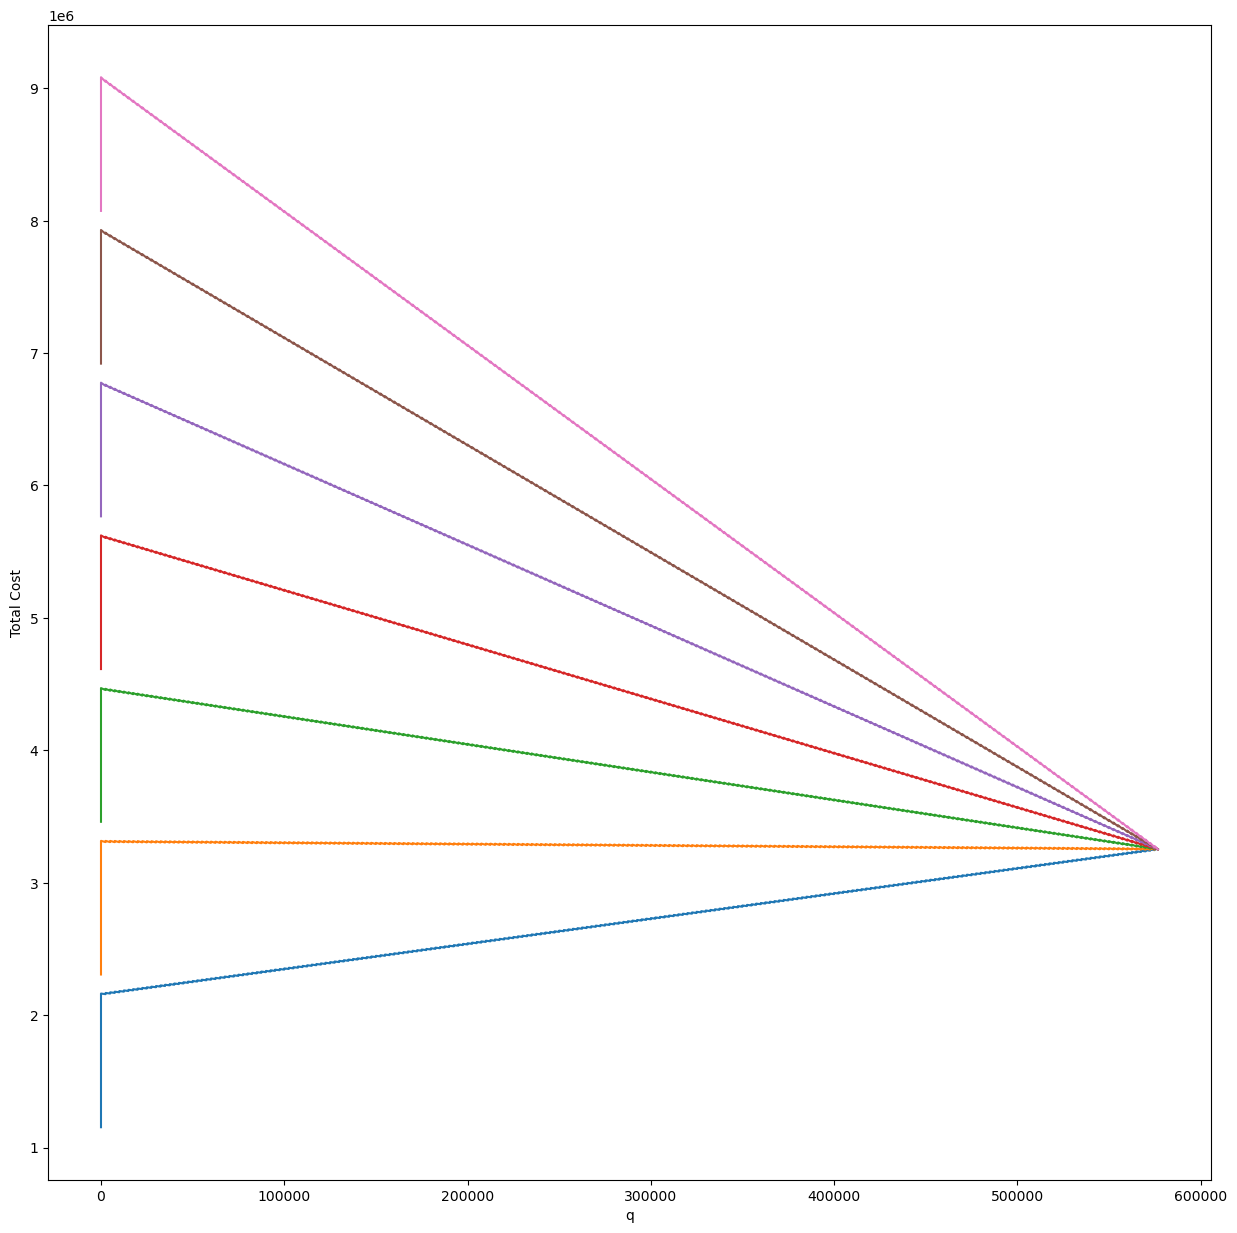

In [27]:
plt.rcParams['figure.figsize'] = [15, 15]

for discount in np.linspace(0.1, 0.7, 7):

    linear_mag(mean_price = 20, QT = QT, M = QT, perc = discount, fixed_cost = 10**6, storage_costs = 0.1, cost_threshold = 5000, extra_cost = 19000)

The share of books on demand for perc = 60.0 % is: 0
The total costs are € 2867500.


{'Books_on_demand': 0, 'Books_stored': 576666, 'Total_cost': 2867499.8}

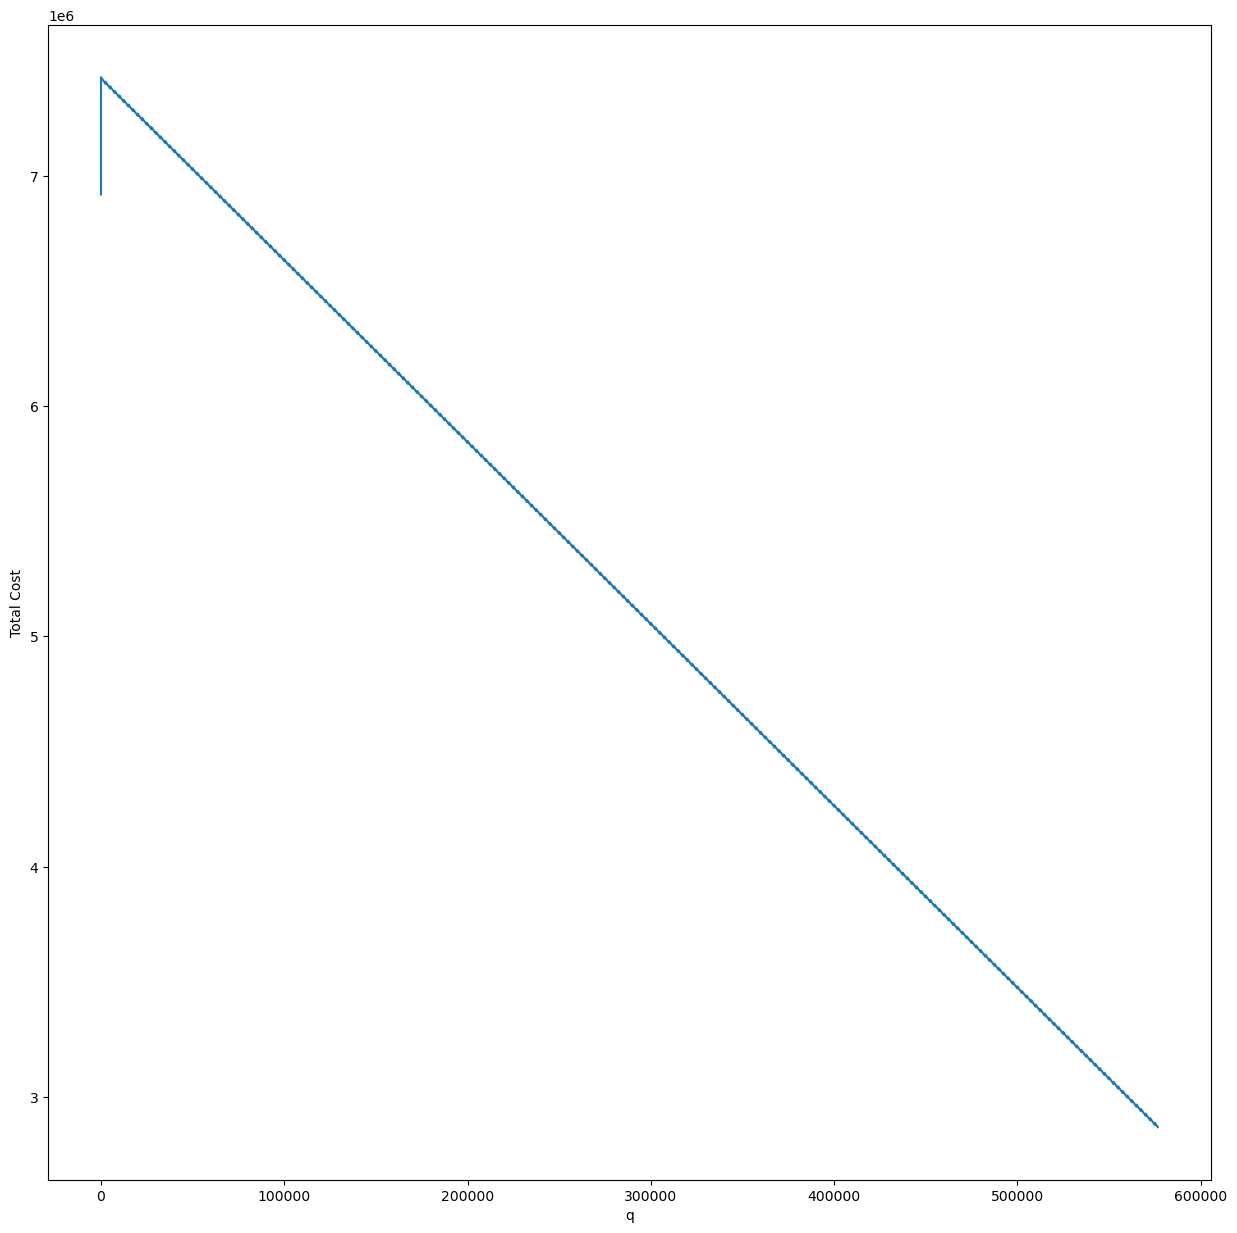

In [28]:
linear_mag(mean_price = 20, QT = QT, M = QT, perc = 0.6, fixed_cost = 5*10**5, storage_costs = 0.3, cost_threshold = 5000, extra_cost = 19000)

## 6.3 - Analysis

The solution of this first model with unlimited space is a piecewise linear function, whose global minimum point varies according to the extra percentage applied on demand. 

Once the function that reflects our specific case has been identified, we can also decide to restrict the warehouse capacity to observe how the optimum varies.

Although it is not a highly complex function, it actually provides us with important indications on how to minimize the costs of printing and storing books in different scenarios, and it is very useful for understanding what are the cost barriers which from time to time establish the right amount of books to be printed or kept directly in stock.

# 7 - Scenario 2: Limited budget

We are now considering a more systematic approach to space assignment. Given the results of *scenario 1*, our driving hypothesis is that storing books is more convenient that *printing on-demand*: we need to decide *which books must always be available* given a certain space, which will work as our main *budget*. 

In other words, we are now adding or changing the following assumptions, which will be formalized in **section 7.1**.

1. Available space is *limited*.
    + Being available space a *constraint*, we are referring to a case in which for *economic reasons* it is not convenient to have all books in storage at the same time. The reasons might be:
        + There is a non-null probability of not clearing all stock, therefore the remaining inventory will weight on the e-commerce financial performance and keeping a full inventory is not a rational decision under a financial KPIs perspective.
        + The capital investment required to accomodate all inventory might not be realistic.
2. Not all books are equally important: the demand is unequally distributed among categories and, inside the same category, among books.
    + We can therefore rank books based on their demand; then, we can use the aggregate demand to rank categories.
    + Given the aggregate demand (category demand), we can compute its density to understand if it is evenly distributed or not, by using the GC.

In the following scenario analysis we are considering a strict constraint, e.g.: we wish to understand what are the most important books, consider only them assuming that they must be kept available and how much space is needed to store them in a *library*, which might correspond to a *physical library* or a *premium e-commerce service*. Space will be *severely limited*, e.g. of orders of magnituded less than what would be necessary to have a full inventory readily available in storage; the ranking will consider only the *best-sellers*, e.g. only the top 1% of books which drives the total demand.

To allocate space, we are assigning *racks* to *categories*. Racks are a *non-divisible unit* for storage space and the number of them assigned to each category is dependent to either:

1. Total category demand: the most demanded categories will have more space.
2. GC: if the demand is evenly distributed, more racks will be assigned. On the contrary, if the category demand is linked to the sales performance of a small proportion of books, less rack space is necessary to have the best sellers available in storage.

In other words, given a total available space *budget*, this space is sub-divided in *units* (*racks*); each unit can be stored with a fixed number of books and which books are going to be stored is determined by their demand.

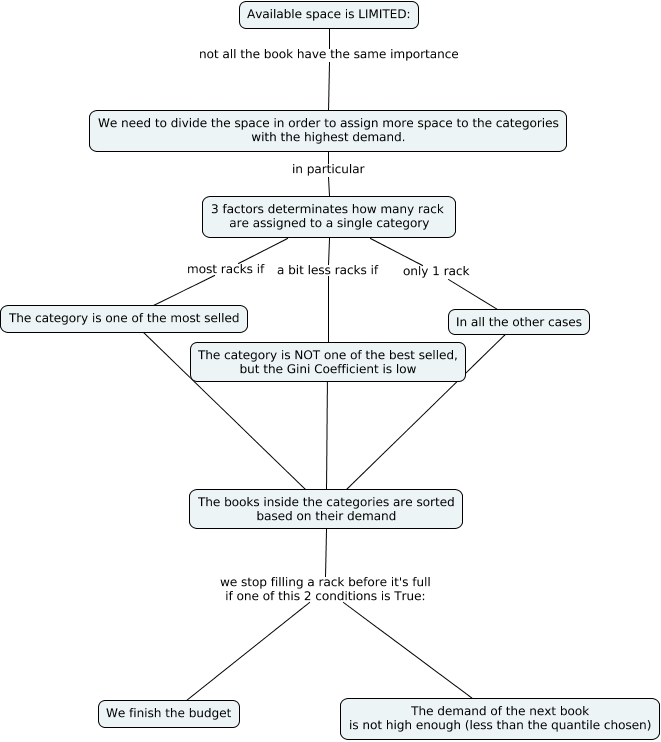

In [29]:

from IPython import display
try:
    from google.colab import drive
    drive.mount('/content/drive')
    data_path = '/content/drive/MyDrive/Colab Notebooks/Amazon co-purchase/E-commerce storage optimisation/Data/'
except:
    data_path = 'Data/'
    
display.Image(data_path+"Cmap-3.jpeg", width=800)


## 7.1 - Mathematical model 

### Variables

Variables and parameters domain:
+ $\{i, j, r, B\} \in N$.
+ $\{\delta \} \in R^+$

Variables and parameters:
+ $i = 1,...,14$ = book categories (as defined in **section 6.1.1**, Dataset Preprocessing).
+ $Q_i = 1, ..., Q^i$ number of books in a category.
+ $j = 1, ... , Q_T$ = books.
+ $x_i$ = number of books for each category to be kept in storage.
+ $Demand(j) = \delta_j $ = demand for book $j$. Represents book utility/relative rank.
    + Given any three books $j_1, j_2, j_3$:
        + If $Demand(j_1) > Demand(j_2) \Rightarrow \delta_1 > \delta_2$.
        + If $Demand(j_1) = Demand(j_2) \Rightarrow \delta_1 = \delta_2$.
        + If $Demand(j_1) < Demand(j_2) \Rightarrow \delta_1 < \delta_2$.
        + If $Demand(j_1) < Demand(j_2) < Demand(j_3) \Rightarrow \delta_1 < \delta_3$
        + $\Delta_i = \sum \delta_j$ = total category demand.
    + $\sum_i \Delta_i = D$ = total demand.
    + $q_{\alpha}$, where $0\leq \alpha \leq 1$ = total books demand distribution quantile of order $\alpha$.
+ $r$ = rack dimension (maximum number of books to be kept in a single rack).
    + $r_i$ = rack assigned to category $i$.
+ $B$ = total available space (*budget*).



### 7.1.1 - Sets
All sets necessary to obtain the model solution and run the simulations are declared in the body of `rack_space`.



### 7.1.2 - Parameters and variables:

All the parameters and variables for this section correspond to:

+ $i$: category labels.
    + `categories_data.Categories`
+ $\delta(j)$: single book demand.
    + `single_book_demand`
+ $\Delta_i$: total category demand.
    + `demand_abs`: absolute frequency.
    + `demand_rel`: relative frequency.
+ $r$: rack size.
    + `max_rack`
+ $B$: available space.
    + `max_budget`
+ $q_{\alpha}$: priority constraint, e.g. we are considering only the top demanded $(1 - \alpha)\%$ books.
    + `priority_constraint` = $\alpha$


### 7.1.3 - Constraints and Objective(s)
Our objective is to implement the best books-allocation solution, in order to have all the most demanded books and to have them organized by main categories (as a normal bookshop). 

Our constraints are:
+ Book demand constraint:
$$
\delta_j \geq q_{\alpha}
$$
+ The rack space constraint is:
$$
\sum^{Q^i}_{j = 1} \delta_j j \leq r
$$
+ The total space constraint is:
$$
\sum^{14}_{i = 1} \Delta_i r_i \leq B
$$

### Objective functions

For each category, compute the number of books to be kept in one or more racks:
$$
\max_j \sum^{Q^i}_{j = 1} \delta_j j 
$$

Then fill the available space until the constraint is met:
$$
\max_{\Delta_i} \sum^{14}_{i = 1} \Delta_i r_i 
$$

## 7.2 - Model solution

In [30]:
def rack_space(max_categories, max_budget, max_rack, books_df, priority_constraint = 0.99, n_racks = 5, best_selling_cat = 5):
  #transform the budget in a number of books

  """ this feature decides how to fill the bookstore shelves and how much space to allocate to books and categories 
      based on demand and other factors and returns the list of books to put in each rack as a dictionnary.

    Args:
        max_categories (numeric): maximum number of categories to include.
        max_budget (numeric): maximum budget we have, that is the space available.
        max_rack (numeric): size of a single rack.
        books_df (dataframe): dataframe which contains important information about books
        priority_constraint (numeric): quantile which indicates the books priority (e.g.: a constraint of 0.99 means that we are considering only the 1% of most demanded books.)
        n_racks (numeric): number of racks to be given to the best selling category.
        best_selling_cat (numeric): number of categories best selled.
        

    Returns:
        (dict): books in each rack
    """
    
  ### SANITY CHECK
  assert max_categories <= len(books_df.Category.unique()), f'There are only {len(books_df.Category.unique())} categories, not {max_categories}'
  assert max_categories >= best_selling_cat, f'The number of categories {max_categories} should be strictly greater than the number of best selling categories {best_selling_cat} considered.'
  assert 0 < priority_constraint < 1, f'The priority constraint is the quantile considered as most important to keep in store, therefore should take values between 0 and 1.'

  ### INITIALIZING VARIABLES
  #a dictionary to store the books inventory for each rack
  rack_inventory = dict()

  #budget counter
  budget = 0

  #create df for the purpose of filling racks
  books_df = pd.merge(books, categories_data, on='Category').drop(['SalesRank', 'demand_abs', 'space_assigned'], axis = 1)

  #rename demand as single_book_demand
  books_df.rename(columns = {'demand':'single_book_demand'}, inplace = True)

  #sort categories by total category demand
  ###drop unneccessary columns
  books_df.drop(['gini_coef'], inplace = True, axis = 1)
  ###sort and keep the first n = max_categories items
  books_df.sort_values(by = 'demand_rel', inplace = True, ascending = False)

  cat_list = books_df.Category.unique()[:max_categories]

  # print('deb0', cat_list) #DEBUGGING
  
  ###SORTING BOOKS AND ASSIGNING SPACE
  
  budget_check = True

  while budget_check:

    # print('deb1', budget, 'First level reached.') #DEBUGGING

    for category in cat_list:
      #if categories end, loop end and all racks are filled without exausting the budget
                
      rack = list()

      #assign racks to category:

      if category in cat_list[:best_selling_cat]:
        rack_size = n_racks*max_rack
      elif categories_data.gini_coef.mean() > categories_data.loc[categories_data.Category == category].gini_coef.values[0]:
        rack_size = (n_racks // 2)*max_rack
      else:
        rack_size = max_rack   

      # print('deb2.1', category, budget) #DEBUGGING

      if budget >= max_budget:
        # print('deb2.2', budget_check, max_budget)
        budget_check = False
        break
      
      # print('deb2.3', budget_check) #DEBUGGING

      #order books by their demand
      #once categories are ordered, fill racks:
      book_list = books_df.loc[books_df.Category == category].sort_values(by = 'single_book_demand', ascending = False)        
              
      priority_quantile = books_df.single_book_demand.quantile(q = priority_constraint)

      # print('deb3', len(book_list)) #DEBUGGING
        
      for title in book_list.Title:

        single_title_demand = book_list.loc[book_list.Title == title].single_book_demand.values[0]
        value_check = single_title_demand > priority_quantile

        # print('deb4', single_title_demand, median_demand) #DEBUGGING

        if value_check and len(rack) < rack_size:
          # print('deb5', value_check, len(rack) < rack_size ) #DEBUGGING
          rack.append(title)
          #count budget: if budget is exausted, loop is ended and everything left out is left to be printed on demand
          budget +=1
          # print('deb666', budget, len(rack)) #DEBUGGING
          if budget >= max_budget:
            budget_check = False
            break
        else:
          break

      rack_inventory[category + ' max available space: ' +  str(rack_size)] = rack

      # print('deb7', budget, len(rack)) #DEBUGGING

      if budget >= max_budget:
        budget_check = False
        break
        # print('deb8', budget_check) #DEBUGGING

    if category == cat_list[len(cat_list) -1] and budget < max_budget:
      budget_check = False
      break
      
  spent_budget = sum([len(rack_inventory[label]) for label in rack_inventory.keys()])
  
  ### OUTPUT
  
  [print(label, f'  + Allocated space: {len(rack_inventory[label])}', sep = '\n') for label in rack_inventory.keys()]
  print('\n', '+ The net available space is: ', max_budget - spent_budget, sep = '')
  
  return rack_inventory

In this first optimization, we are trying to find the optimal space allocation for the top 1% books, given a maximum capacity of 2000 and a rack size of 30.
The top 3 categories will have 5 times the rack space of the lesser important ones; the categories in which the demand is evenly distributed will have this space doubled.

In [31]:
rack_1 = rack_space(max_categories = 14, max_budget = 4000, max_rack = 50, priority_constraint = 0.99, books_df = books, best_selling_cat = 5)

Entertainment max available space: 250
  + Allocated space: 250
Literature & Fiction max available space: 250
  + Allocated space: 250
Home & Office max available space: 250
  + Allocated space: 250
Children's Books max available space: 250
  + Allocated space: 250
Religion & Spirituality max available space: 250
  + Allocated space: 250
Professional & Technical max available space: 100
  + Allocated space: 100
Books, Music & More max available space: 50
  + Allocated space: 50
Nonfiction max available space: 100
  + Allocated space: 100
History max available space: 100
  + Allocated space: 100
Reference max available space: 50
  + Allocated space: 50
Mystery & Thrillers max available space: 50
  + Allocated space: 50
Science max available space: 100
  + Allocated space: 68
Foreign Language Books max available space: 100
  + Allocated space: 31
Computers & Internet max available space: 100
  + Allocated space: 38

+ The net available space is: 2163


> When considering only the top 1% of books, the budget is not exhausted. Moreover, not all shelves are full: this means that books in the lesser important categories do not belong to the top 1% of sellers, therefore are to be printed on demand. 

We then choose a less strict ranking constraint by considering the top 10% of best sellers and doubling the number of racks available to the top 3 categories: this means that we will reach the space limit by filling it up with the most demanded books in the most demanded categories.

In [32]:
rack_2 = rack_space(max_categories = 14, max_budget = 2000, max_rack = 30, priority_constraint = 0.90, n_racks  = 10, books_df = books, best_selling_cat = 3)

Entertainment max available space: 300
  + Allocated space: 300
Literature & Fiction max available space: 300
  + Allocated space: 300
Home & Office max available space: 300
  + Allocated space: 300
Children's Books max available space: 30
  + Allocated space: 30
Religion & Spirituality max available space: 150
  + Allocated space: 150
Professional & Technical max available space: 150
  + Allocated space: 150
Books, Music & More max available space: 30
  + Allocated space: 30
Nonfiction max available space: 150
  + Allocated space: 150
History max available space: 150
  + Allocated space: 150
Reference max available space: 30
  + Allocated space: 30
Mystery & Thrillers max available space: 30
  + Allocated space: 30
Science max available space: 150
  + Allocated space: 150
Foreign Language Books max available space: 150
  + Allocated space: 150
Computers & Internet max available space: 150
  + Allocated space: 80

+ The net available space is: 0


> In this case, we reach the budget limit while still only considering the top 10% of best sellers of all books.

## 7.3 - Analysis

In the analysis of the first scenario, we defined a function capable of indicating the optimal quantity of books to keep in the bookshop, given limited space.  
The goal of this second scenario is to understand which categories and titles will occupy the available space.

Our solution to this problem is a model that, for each combination of the input variables, indicates the best possible distribution of space between the book titles (and categories), based on the following assumptions: 
+ the best-selling categories are also the most important, so they are given more space in the bookshop.
+ the more uniform the books demand within a category, the more titles we will need to stock in order to meet future demand. In this case, a low value of the gini coefficient corresponds to a greater allocation of books.


The input variables are parameters that the model takes to fine tune the space distribution for each possible case. 
In particular, the model can optimize the book allocation by reacting to any change of:
+ maximum number of categories to include
+ maximum space available
+ rack sizing
+ number of racks to be given to the best selling categories
+ number of best selling categories (decided at will)

Another parameter that can be changed as needed is the `priority_constraint`. A high value of this variable indicates a narrower selection of the books that will form the so-called "best sellers" for each category. 
In our first case, a value of 0.99 means that our selection of "best sellers" will only include titles that, within the category, have a higher demand than the remaining 99% of books. Since such a rigid selection may not allow us to fill all the available space, we can use this variable as a knob to raise/lower the threshold that will decide whether books are stored or not.

it must be emphasized that this model **DOES NOT** take into account the cost of the racks; an estimate of the latter, in fact, is already included in the `cost_threshold` of our previous `linear_mag` function, which adds extra costs when a certain threshold of titles in stock is exceeded. 
The explanation for this choice is the following: if in the `linear_mag` function we do not take into account a possible price for the racks, it could be that, having to add their cost after having found the optimal quantity of titles to store, this solution may no longer be the best, due to the piecewise form of the function. 

Our models, in fact, have been designed to perform best if run in sequence; leaving aside for a moment the case of unlimited space (very unlikely, but if you have money... good for you!), our best way to find the optimal amount of books to store is by running the `linear_mag` function: once the optimal quantity is found, our `rack_space` will do the job, returning for each category the number of books to store, their titles and, in case, the available space left unstored, allowing to modify the parameters at will until an optimal solution is reached.


---

# Extra Materials

## Keep at least $n$ books for every category:

In [33]:
def rack_space_fixed(max_categories, max_budget, max_rack, books_df, fixed_space = 5, priority_constraint = 0.99, n_racks = 5, best_selling_cat = 5):
  #transform the budget in a number of books

  """ this feature decides how to fill the bookstore shelves and how much space to allocate to books and categories 
      based on demand and other factors and returns the list of books to put in each rack as a dictionnary.

    Args:
        max_categories (numeric): maximum number of categories to include.
        max_budget (numeric): maximum budget we have, that is the space available.
        max_rack (numeric): size of a single rack.
        books_df (dataframe): dataframe which contains important information about books
        priority_constraint (numeric): quantile which indicates the books priority (e.g.: a constraint of 0.99 means that we are considering only the 1% of most demanded books.)
        n_racks (numeric): number of racks to be given to the best selling category.
        best_selling_cat (numeric): number of categories best selled.
        

    Returns:
        (dict): books in each rack
    """
    
  ### SANITY CHECK
  assert max_categories <= len(books_df.Category.unique()), f'There are only {len(books_df.Category.unique())} categories, not {max_categories}'
  assert max_categories >= best_selling_cat, f'The number of categories {max_categories} should be strictly greater than the number of best selling categories {best_selling_cat} considered.'
  assert 0 < priority_constraint < 1, f'The priority constraint is the quantile considered as most important to keep in store, therefore should take values between 0 and 1.'

  ### INITIALIZING VARIABLES
  #a dictionary to store the books inventory for each rack
  rack_inventory = dict()

  #budget counter
  budget = 0

  #create df for the purpose of filling racks
  books_df = pd.merge(books, categories_data, on='Category').drop(['SalesRank', 'demand_abs', 'space_assigned'], axis = 1)

  #rename demand as single_book_demand
  books_df.rename(columns = {'demand':'single_book_demand'}, inplace = True)

  #sort categories by total category demand
  ###drop unneccessary columns
  books_df.drop(['gini_coef'], inplace = True, axis = 1)
  ###sort and keep the first n = max_categories items
  books_df.sort_values(by = 'demand_rel', inplace = True, ascending = False)

  cat_list = books_df.Category.unique()[:max_categories]

  # print('deb0', cat_list) #DEBUGGING
  
  ###SORTING BOOKS AND ASSIGNING SPACE
  
  budget_check = True

  while budget_check:

    # print('deb1', budget, 'First level reached.') #DEBUGGING

    for category in cat_list:
            #if categories end, loop end and all racks are filled without exausting the budget
                
      rack = list()

      #assign racks to category:

      if category in cat_list[:best_selling_cat]:
        rack_size = n_racks*max_rack
      elif categories_data.gini_coef.mean() > categories_data.loc[categories_data.Category == category].gini_coef.values[0]:
        rack_size = (n_racks // 2)*max_rack
      else:
        rack_size = max_rack   

      # print('deb2.1', category, budget) #DEBUGGING

      if budget >= max_budget:
        # print('deb2.2', budget_check, max_budget)
        budget_check = False
        break
      
      # print('deb2.3', budget_check) #DEBUGGING

      #order books by their demand
      #once categories are ordered, fill racks:
      book_list = books_df.loc[books_df.Category == category].sort_values(by = 'single_book_demand', ascending = False)        
              
      priority_quantile = books_df.single_book_demand.quantile(q = priority_constraint)

      # print('deb3', len(book_list)) #DEBUGGING
        
      for title in book_list.Title[:fixed_space]:

        single_title_demand = book_list.loc[book_list.Title == title].single_book_demand.values[0]
        value_check = single_title_demand > priority_quantile

        # print('deb4', single_title_demand, median_demand) #DEBUGGING

        if value_check and len(rack) < rack_size:
          # print('deb5', value_check, len(rack) < rack_size ) #DEBUGGING
          rack.append(title)
          #count budget: if budget is exausted, loop is ended and everything left out is left to be printed on demand
          budget +=1
          # print('deb666', budget, len(rack)) #DEBUGGING
          if budget >= max_budget:
            budget_check = False
            break
        else:
          break

      rack_inventory[category + ' max available space: ' +  str(rack_size)] = rack

      # print('deb7', budget, len(rack)) #DEBUGGING

      if budget >= max_budget:
        budget_check = False
        break
        # print('deb8', budget_check) #DEBUGGING

    if category == cat_list[len(cat_list) -1] and budget < max_budget:
      budget_check = False
      break
      
  spent_budget = sum([len(rack_inventory[label]) for label in rack_inventory.keys()])
  
  ### OUTPUT
  
  [print(label, f'  + Allocated space: {len(rack_inventory[label])}', sep = '\n') for label in rack_inventory.keys()]
  print('\n', '+ The net available space is: ', max_budget - spent_budget, sep = '')
  
  return rack_inventory

In [34]:
rack_space_fixed(max_categories = 14, max_budget = 100, max_rack = 30, priority_constraint = 0.99, n_racks  = 5, books_df = books, best_selling_cat = 3)

Entertainment max available space: 150
  + Allocated space: 5
Literature & Fiction max available space: 150
  + Allocated space: 5
Home & Office max available space: 150
  + Allocated space: 5
Children's Books max available space: 30
  + Allocated space: 5
Religion & Spirituality max available space: 60
  + Allocated space: 5
Professional & Technical max available space: 60
  + Allocated space: 5
Books, Music & More max available space: 30
  + Allocated space: 5
Nonfiction max available space: 60
  + Allocated space: 5
History max available space: 60
  + Allocated space: 5
Reference max available space: 30
  + Allocated space: 5
Mystery & Thrillers max available space: 30
  + Allocated space: 5
Science max available space: 60
  + Allocated space: 5
Foreign Language Books max available space: 60
  + Allocated space: 5
Computers & Internet max available space: 60
  + Allocated space: 5

+ The net available space is: 30


{'Entertainment max available space: 150': ['The South Beach Diet: The Delicious, Doctor-Designed, Foolproof Plan for Fast and Healthy Weight Loss',
  'The Five Love Languages: How to Express Heartfelt Commitment to Your Mate',
  'The Theory of Poker',
  "Caro's Book of Poker Tells",
  "It's Not About the Bike: My Journey Back to Life"],
 'Literature & Fiction max available space: 150': ['Sisterhood of the Traveling Pants (Sisterhood of Traveling Pants)',
  'The Secret Life of Bees',
  'Life of Pi',
  'The Catcher in the Rye',
  'Fahrenheit 451'],
 'Home & Office max available space: 150': ['The Tipping Point: How Little Things Can Make a Big Difference',
  "Good to Great: Why Some Companies Make the Leap... and Others Don't",
  'Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!',
  'Now, Discover Your Strengths',
  'How to Win Friends & Influence People'],
 "Children's Books max available space: 30": ['Harry Potter and the Order of 

In [35]:
def rack_space_fixed2(max_categories, max_budget, max_rack, books_df, fixed_space = 5, priority_constraint = 0.99, n_racks = 5, best_selling_cat = 5):
  #transform the budget in a number of books

  """ this feature decides how to fill the bookstore shelves and how much space to allocate to books and categories 
      based on demand and other factors and returns the list of books to put in each rack as a dictionnary.

    Args:
        max_categories (numeric): maximum number of categories to include.
        max_budget (numeric): maximum budget we have, that is the space available.
        max_rack (numeric): size of a single rack.
        books_df (dataframe): dataframe which contains important information about books
        priority_constraint (numeric): quantile which indicates the books priority (e.g.: a constraint of 0.99 means that we are considering only the 1% of most demanded books.)
        n_racks (numeric): number of racks to be given to the best selling category.
        best_selling_cat (numeric): number of categories best selled.
        

    Returns:
        (dict): books in each rack
    """
    
  ### SANITY CHECK
  assert max_categories <= len(books_df.Category.unique()), f'There are only {len(books_df.Category.unique())} categories, not {max_categories}'
  assert max_categories >= best_selling_cat, f'The number of categories {max_categories} should be strictly greater than the number of best selling categories {best_selling_cat} considered.'
  assert 0 < priority_constraint < 1, f'The priority constraint is the quantile considered as most important to keep in store, therefore should take values between 0 and 1.'

  ### INITIALIZING VARIABLES
  #a dictionary to store the books inventory for each rack
  rack_inventory = dict()

  #budget counter
  budget = fixed_space*max_categories
  
  #create df for the purpose of filling racks
  books_df = pd.merge(books, categories_data, on='Category').drop(['SalesRank', 'demand_abs', 'space_assigned'], axis = 1)

  #rename demand as single_book_demand
  books_df.rename(columns = {'demand':'single_book_demand'}, inplace = True)

  #sort categories by total category demand
  ###drop unneccessary columns
  books_df.drop(['gini_coef'], inplace = True, axis = 1)
  ###sort and keep the first n = max_categories items
  books_df.sort_values(by = 'demand_rel', inplace = True, ascending = False)

  cat_list = books_df.Category.unique()[:max_categories]

  # print('deb0', cat_list) #DEBUGGING
  
  ###SORTING BOOKS AND ASSIGNING SPACE
  
  budget_check = True

  while budget_check:

    # print('deb1', budget, 'First level reached.') #DEBUGGING

    for category in cat_list:
            #if categories end, loop end and all racks are filled without exausting the budget
                
      rack = list()

      #assign racks to category:

      if category in cat_list[:best_selling_cat]:
        rack_size = n_racks*max_rack
      elif categories_data.gini_coef.mean() > categories_data.loc[categories_data.Category == category].gini_coef.values[0]:
        rack_size = (n_racks // 2)*max_rack
      else:
        rack_size = max_rack   

      # print('deb2.1', category, budget) #DEBUGGING

      if budget >= max_budget:
        # print('deb2.2', budget_check, max_budget)
        budget_check = False
        break
      
      # print('deb2.3', budget_check) #DEBUGGING

      #order books by their demand
      #once categories are ordered, fill racks:
      book_list = books_df.loc[books_df.Category == category].sort_values(by = 'single_book_demand', ascending = False)        
              
      priority_quantile = books_df.single_book_demand.quantile(q = priority_constraint)

      # print('deb3', len(book_list)) #DEBUGGING
        
      for title in book_list.Title[(fixed_space -1):]:

        single_title_demand = book_list.loc[book_list.Title == title].single_book_demand.values[0]
        value_check = single_title_demand > priority_quantile

        # print('deb4', single_title_demand, median_demand) #DEBUGGING

        if value_check and len(rack) < rack_size:
          # print('deb5', value_check, len(rack) < rack_size ) #DEBUGGING
          rack.append(title)
          #count budget: if budget is exausted, loop is ended and everything left out is left to be printed on demand
          budget +=1
          # print('deb666', budget, len(rack)) #DEBUGGING
          if budget >= max_budget:
            budget_check = False
            break
        else:
          break

      rack_inventory[category + ' max available space: ' +  str(rack_size)] = rack

      # print('deb7', budget, len(rack)) #DEBUGGING

      if budget >= max_budget:
        budget_check = False
        break
        # print('deb8', budget_check) #DEBUGGING

    if category == cat_list[len(cat_list) -1] and budget < max_budget:
      budget_check = False
      break
      
  spent_budget = sum([len(rack_inventory[label]) for label in rack_inventory.keys()])
  
  ### OUTPUT
  
  [print(label, f'  + Allocated space: {len(rack_inventory[label])}', sep = '\n') for label in rack_inventory.keys()]
  print('\n', '+ The net available space is: ', max_budget - spent_budget, sep = '')
  
  return rack_inventory

In [36]:
rack_space_fixed2(max_categories = 14, max_budget = 930, max_rack = 30, priority_constraint = 0.99, n_racks  = 5, books_df = books, best_selling_cat = 3)

Entertainment max available space: 150
  + Allocated space: 150
Literature & Fiction max available space: 150
  + Allocated space: 150
Home & Office max available space: 150
  + Allocated space: 150
Children's Books max available space: 30
  + Allocated space: 30
Religion & Spirituality max available space: 60
  + Allocated space: 60
Professional & Technical max available space: 60
  + Allocated space: 60
Books, Music & More max available space: 30
  + Allocated space: 30
Nonfiction max available space: 60
  + Allocated space: 60
History max available space: 60
  + Allocated space: 60
Reference max available space: 30
  + Allocated space: 30
Mystery & Thrillers max available space: 30
  + Allocated space: 30
Science max available space: 60
  + Allocated space: 50

+ The net available space is: 70


{'Entertainment max available space: 150': ["It's Not About the Bike: My Journey Back to Life",
  'Eat Right for Your Type',
  "Doyle Brunson's Super System: A Course in Power Poker",
  "The Seven Principles for Making Marriage Work : A Practical Guide from the Country's Foremost Relationship Expert",
  'The Four Agreements: A Practical Guide to Personal Freedom',
  'Body for Life: 12 Weeks to Mental and Physical Strength',
  'The Barefoot Contessa Cookbook',
  'Codependent No More : How to Stop Controlling Others and Start Caring for Yourself',
  'The Art of Machine Piecing: How to Achieve Quality Workmanship Through a Colorful Journey',
  'Five Minutes to Orgasm Every Time You Make Love: Female Orgasm Made Simple',
  'Influence: The Psychology of Persuasion',
  'Driven To Distraction : Recognizing and Coping with Attention Deficit Disorder from Childhood Through Adulthood',
  "Hold'Em Poker for Advanced Players (Advance Player)",
  "One Man's Wilderness: An Alaskan Odyssey",
  'Super